My goal is to evaluate the effect of a change (a new web design or feature) by comparing the performance of Group A (control) versus Group B (variant) using data analysis.

In [20]:
# pip install pandas statsmodels

import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

In [21]:
#  Loading the dataset
AB= pd.read_csv('ab_data.csv')
AB

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [6]:
AB.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [7]:
AB.duplicated().sum()

np.int64(0)

In [8]:
AB.shape

(294478, 5)

In [17]:
# Calculating Conversion Rates
#count: Number of users in each group.
#sum: Number of conversions (i.e., how many got 1 in “converted”).

grouped = AB.groupby('group')['converted'].agg(['count', 'sum'])
print(grouped)

            count    sum
group                   
control    147202  17723
treatment  147276  17514


In [10]:
grouped['conversion_rate'] = grouped['sum'] / grouped['count']
print(grouped)

            count    sum  conversion_rate
group                                    
control    147202  17723         0.120399
treatment  147276  17514         0.118920


In [ ]:
# Performing Hypothesis Test
#I checked if the difference in conversion rates between group A and B is statistically significant using a z-test.
# Number of conversions in each group
conversions = grouped['sum'].values

# Total number of users in each group
samples = grouped['count'].values

# Z-test
z_stat, p_value = proportions_ztest(count=conversions, nobs=samples)
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: 1.2369217547321678
P-value: 0.21611613269757501


In [19]:
# Interpreting the Result
#Decision Rule:
#p < 0.05 → There is a real difference
#p ≥ 0.05 → The difference might be due to chance

if p_value < 0.05:
    print("Result is statistically significant: the change had an effect!")
else:
    print("Result is NOT statistically significant: the change may not have had a real effect.")

Result is NOT statistically significant: the change may not have had a real effect.


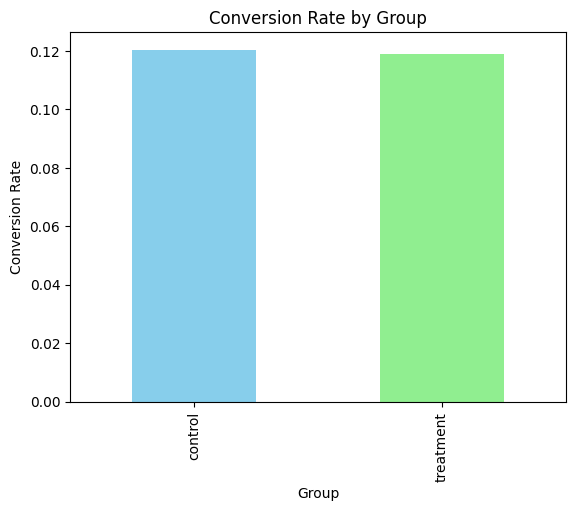

In [14]:
# Visualizing the result

grouped['conversion_rate'].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()